In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("../data/processed/ev_sales_by_makers_cleaned_20250806.csv")
dim_date = pd.read_csv("../data/raw/dim_date.csv")

dim_date["date"], df["date"] = pd.to_datetime(dim_date["date"]), pd.to_datetime(
    df["date"]
)

display(df.head())
display(dim_date.head())

merge_df = pd.merge(dim_date, df, on="date", how="inner")

display(merge_df.head())

/tmp/ipykernel_308366/3617416542.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date["date"], df["date"] = pd.to_datetime(dim_date["date"]), pd.to_datetime(


,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,465931d3-9bd6-43b5-ab1f-aace65b11dfb,2021,April,0,Two-Wheeler Manufacturer
1,2022-04-01,2-Wheelers,OKAYA EV,0,1d7ca2e2-988c-42e9-9d44-8b08a759fbbf,2022,April,0,Two-Wheeler Manufacturer
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,9da18de8-1173-4717-a894-f3b0748e3249,2021,May,0,Two-Wheeler Manufacturer
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,ac373721-db45-46df-bc6a-86f0d663253a,2021,June,0,Two-Wheeler Manufacturer
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,9919575b-4d9d-4823-a9a1-f2a1b7c037c7,2021,July,0,Two-Wheeler Manufacturer


,date,fiscal_year,quarter
0,2021-04-01,2022,Q1
1,2021-05-01,2022,Q1
2,2021-06-01,2022,Q1
3,2021-07-01,2022,Q2
4,2021-08-01,2022,Q2


,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0,465931d3-9bd6-43b5-ab1f-aace65b11dfb,2021,April,0,Two-Wheeler Manufacturer
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0,c57fec52-2208-46e0-933c-7bd100265253,2021,April,0,Four-Wheeler Manufacturer
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0,058777d2-ee66-4d2a-b050-e95bfdf75870,2021,April,0,Four-Wheeler Manufacturer
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0,4cdb0c49-c11c-40f3-b7af-f070dd2bfc4f,2021,April,0,Four-Wheeler Manufacturer
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0,9e338527-5dab-4026-9238-69477647121b,2021,April,0,Four-Wheeler Manufacturer


In [8]:
quarterly_sales = (
    merge_df[merge_df['vehicle_category'] == '2-Wheelers'].groupby(["maker", "quarter"])["electric_vehicles_sold"].sum().reset_index()
)

quarterly_sales_4w = (
    merge_df[merge_df['vehicle_category'] == '4-Wheelers'].groupby(["maker", "quarter"])["electric_vehicles_sold"].sum().reset_index()
)

display(quarterly_sales.head())
display(quarterly_sales_4w.head())

,maker,quarter,electric_vehicles_sold
0,AMPERE,Q1,43588
1,AMPERE,Q2,33683
2,AMPERE,Q3,46155
3,AMPERE,Q4,43848
4,ATHER,Q1,38497


,maker,quarter,electric_vehicles_sold
0,BMW India,Q1,206
1,BMW India,Q2,247
2,BMW India,Q3,468
3,BMW India,Q4,449
4,BYD India,Q1,487


In [10]:
# Sort and calculate growth rate per manufacturer
quarterly_sales = quarterly_sales.sort_values(['maker', 'quarter'])
quarterly_sales['growth_rate'] = (
    quarterly_sales.groupby('maker')['electric_vehicles_sold']
    .pct_change() * 100
)


quarterly_sales_4w = quarterly_sales_4w.sort_values(['maker', 'quarter'])
quarterly_sales_4w['growth_rate'] = (
    quarterly_sales_4w.groupby('maker')['electric_vehicles_sold']
    .pct_change() * 100
)


display(quarterly_sales.head())
display(quarterly_sales.isnull().sum())


display(quarterly_sales_4w.head())
display(quarterly_sales_4w.isnull().sum())

,maker,quarter,electric_vehicles_sold,growth_rate
0,AMPERE,Q1,43588,NaN
1,AMPERE,Q2,33683,-22.724144
2,AMPERE,Q3,46155,37.027581
3,AMPERE,Q4,43848,-4.998375
4,ATHER,Q1,38497,NaN


maker                      0
quarter                    0
electric_vehicles_sold     0
growth_rate               16
dtype: int64

,maker,quarter,electric_vehicles_sold,growth_rate
0,BMW India,Q1,206,NaN
1,BMW India,Q2,247,19.902913
2,BMW India,Q3,468,89.473684
3,BMW India,Q4,449,-4.059829
4,BYD India,Q1,487,NaN


maker                      0
quarter                    0
electric_vehicles_sold     0
growth_rate               10
dtype: int64

In [12]:
# Total sales per manufacturer
total_sales = (
    quarterly_sales.groupby("maker")["electric_vehicles_sold"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_manufacturer = total_sales.loc[0, "maker"]
bottom_manufacturer = total_sales.loc[total_sales.index[-1], "maker"]

display(total_sales.head())
display(top_manufacturer)
display(bottom_manufacturer)

# Calculate market share
total_sales_sum = total_sales['electric_vehicles_sold'].sum()
total_sales['market_share_%'] = (total_sales['electric_vehicles_sold'] / total_sales_sum) * 100

# Round for neatness
total_sales['market_share_%'] = total_sales['market_share_%'].round(2)

display(total_sales.head())


# Total sales per manufacturer
total_sales_4w = (
    quarterly_sales_4w.groupby("maker")["electric_vehicles_sold"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_manufacturer_4w = total_sales_4w.loc[0, "maker"]
bottom_manufacturer_4w = total_sales_4w.loc[total_sales_4w.index[-1], "maker"]

display(total_sales_4w.head())
display(top_manufacturer_4w)
display(bottom_manufacturer_4w)

# Calculate market share
total_sales_4w_sum = total_sales_4w['electric_vehicles_sold'].sum()
total_sales_4w['market_share_%'] = (total_sales_4w['electric_vehicles_sold'] / total_sales_4w_sum) * 100

# Round for neatness
total_sales_4w['market_share_%'] = total_sales_4w['market_share_%'].round(2)

display(total_sales_4w.head())

,maker,electric_vehicles_sold
0,OLA ELECTRIC,489473
1,TVS,272575
2,ATHER,204449
3,HERO ELECTRIC,170394
4,AMPERE,167274


'OLA ELECTRIC'

'BATTRE ELECTRIC'

,maker,electric_vehicles_sold,market_share_%
0,OLA ELECTRIC,489473,25.58
1,TVS,272575,14.25
2,ATHER,204449,10.69
3,HERO ELECTRIC,170394,8.91
4,AMPERE,167274,8.74


,maker,electric_vehicles_sold
0,Tata Motors,88935
1,Mahindra and Mahindra,41193
2,MG Motor,13753
3,BYD India,2419
4,Hyundai Motor,2076


'Tata Motors'

'Mercedes-Benz AG'

,maker,electric_vehicles_sold,market_share_%
0,Tata Motors,88935,58.15
1,Mahindra and Mahindra,41193,26.93
2,MG Motor,13753,8.99
3,BYD India,2419,1.58
4,Hyundai Motor,2076,1.36


/tmp/ipykernel_308366/761103259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


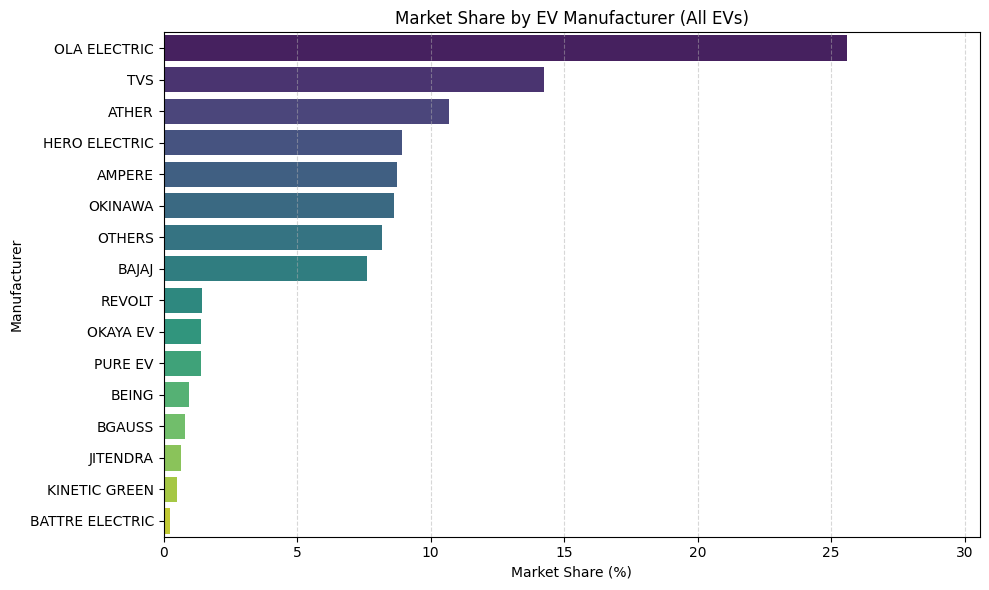

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=total_sales,
    x='market_share_%',
    y='maker',
    palette='viridis'
)

plt.title('Market Share by EV Manufacturer (All EVs)')
plt.xlabel('Market Share (%)')
plt.ylabel('Manufacturer')
plt.xlim(0, total_sales['market_share_%'].max() + 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


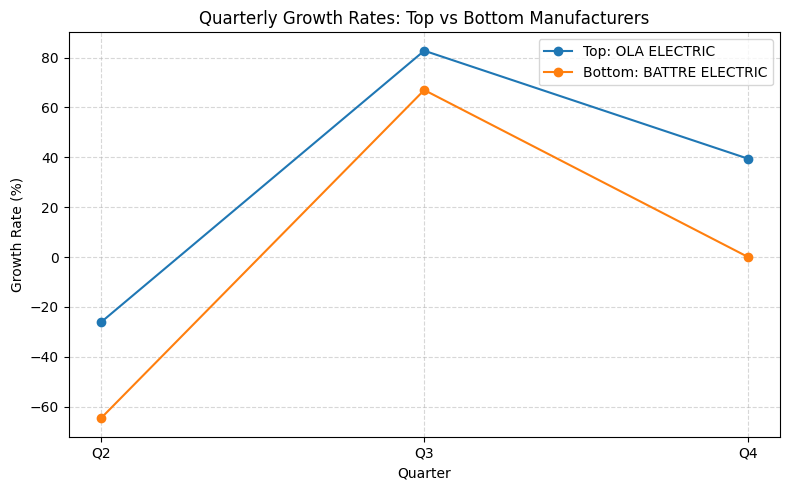

In [13]:
import matplotlib.pyplot as plt

# Get growth rates for top and bottom manufacturers
top_growth = quarterly_sales[quarterly_sales['maker'] == top_manufacturer]['growth_rate'].values
bottom_growth = quarterly_sales[quarterly_sales['maker'] == bottom_manufacturer]['growth_rate'].values
quarters = quarterly_sales[quarterly_sales['maker'] == top_manufacturer]['quarter'].astype(str).values

plt.figure(figsize=(8,5))
plt.plot(quarters, top_growth, marker='o', label=f'Top: {top_manufacturer}')
plt.plot(quarters, bottom_growth, marker='o', label=f'Bottom: {bottom_manufacturer}')
plt.title('Quarterly Growth Rates: Top vs Bottom Manufacturers')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Quarter')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [27]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Keep only Top 5 and reverse for plotting so largest is at top
top5_2w = total_sales.sort_values(by='market_share_%', ascending=False).head(5)
top5_2w = top5_2w.iloc[::-1]  # reverse for horizontal bar display

top5_4w = total_sales_4w.sort_values(by='market_share_%', ascending=False).head(5)
top5_4w = top5_4w.iloc[::-1]

# Create subplot layout
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Top 5 Manufacturers (All EVs)", "Top 5 Manufacturers (4-Wheelers)"),
    horizontal_spacing=0.15
)

# All EVs
fig.add_trace(
    go.Bar(
        x=top5_2w['market_share_%'],
        y=top5_2w['maker'],
        orientation='h',
        text=top5_2w['market_share_%'].round(2).astype(str) + '%',
        textposition='outside',
        marker=dict(color=px.colors.sequential.Viridis)
    ),
    row=1, col=1
)

# 4W Only
fig.add_trace(
    go.Bar(
        x=top5_4w['market_share_%'],
        y=top5_4w['maker'],
        orientation='h',
        text=top5_4w['market_share_%'].round(2).astype(str) + '%',
        textposition='outside',
        marker=dict(color=px.colors.sequential.Plasma)
    ),
    row=1, col=2
)

# Layout settings
fig.update_layout(
    height=500,
    # width=1300,
    showlegend=False,
    title_text="Market Share of Top 5 EV Manufacturers",
    title_x=0.5
)

# Axis labels
fig.update_xaxes(title_text="Market Share (%)", row=1, col=1)
fig.update_xaxes(title_text="Market Share (%)", row=1, col=2)
fig.update_yaxes(title_text="Manufacturer", row=1, col=1)
fig.update_yaxes(title_text="", row=1, col=2)

fig.show()


In [45]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate HHI (Herfindahl-Hirschman Index)
# HHI = sum of squared market shares (as fractions, not percent)
def calculate_hhi(market_shares):
    return ((market_shares / 100) ** 2).sum() * 10000  # HHI scaled by 10,000

# Prepare data for 2W and 4W
top5_2w = total_sales.sort_values(by='market_share_%', ascending=False).head(5)
top5_4w = total_sales_4w.sort_values(by='market_share_%', ascending=False).head(5)

hhi_2w = calculate_hhi(total_sales['market_share_%'])
hhi_4w = calculate_hhi(total_sales_4w['market_share_%'])

# --------------------
# 2-WHEELERS DASHBOARD
# --------------------
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Top 5 Manufacturers Market Share (2W)", "Market Concentration Index (HHI)"),
    column_widths=[0.6, 0.9],
    specs=[[{"type": "xy"}, {"type": "domain"}]]
)

# Market Share Bar (2W)
fig.add_trace(
    go.Bar(
        x=top5_2w['market_share_%'],
        y=top5_2w['maker'],
        orientation='h',
        text=top5_2w['market_share_%'].round(2).astype(str) + '%',
        textposition='outside',
        marker=dict(color=px.colors.sequential.Viridis)
    ),
    row=1, col=1
)

# HHI Gauge (2W)
fig.add_trace(
    go.Indicator(
        mode="gauge+number",
        value=hhi_2w,
        title={'text': "2W HHI Index"},
        gauge={
            'axis': {'range': [0, 10000]},
            'bar': {'color': "#1E88E5"},
            'steps': [
                {'range': [0, 1500], 'color': "#e0f7fa"},
                {'range': [1500, 2500], 'color': "#b2ebf2"},
                {'range': [2500, 10000], 'color': "#80deea"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': hhi_2w
            }
        }
    ),
    row=1, col=2
)

fig.update_layout(
    height=500,
    showlegend=False,
    title_text="Market Share and Concentration Index (2-Wheelers)",
    title_x=0.5
)

fig.update_xaxes(title_text="Market Share (%)", row=1, col=1)
fig.update_yaxes(title_text="Manufacturer", row=1, col=1)

fig.show()

# --------------------
# 4-WHEELERS DASHBOARD
fig2 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Top 5 Manufacturers Market Share (4W)", "Market Concentration Index (HHI)"),
    column_widths=[0.6, 0.9],
    specs=[[{"type": "xy"}, {"type": "domain"}]]
)

# Market Share Bar (4W)
fig2.add_trace(
    go.Bar(
        x=top5_4w['market_share_%'],
        y=top5_4w['maker'],
        orientation='h',
        text=top5_4w['market_share_%'].round(2).astype(str) + '%',
        textposition='outside',
        marker=dict(color=px.colors.sequential.Plasma)
    ),
    row=1, col=1
)

# HHI Gauge (4W)
fig2.add_trace(
    go.Indicator(
        mode="gauge+number",
        value=hhi_4w,
        title={'text': "4W HHI Index"},
        gauge={
            'axis': {'range': [0, 10000]},
            'bar': {'color': "#43a047"},
            'steps': [
                {'range': [0, 1500], 'color': "#e8f5e9"},
                {'range': [1500, 2500], 'color': "#c8e6c9"},
                {'range': [2500, 10000], 'color': "#a5d6a7"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': hhi_4w
            }
        }
    ),
    row=1, col=2
)

fig2.update_layout(
    height=500,
    showlegend=False,
    title_text="Market Share and Concentration Index (4-Wheelers)",
    title_x=0.5
)

fig2.update_xaxes(title_text="Market Share (%)", row=1, col=1)
fig2.update_yaxes(title_text="Manufacturer", row=1, col=1)

fig2.show()


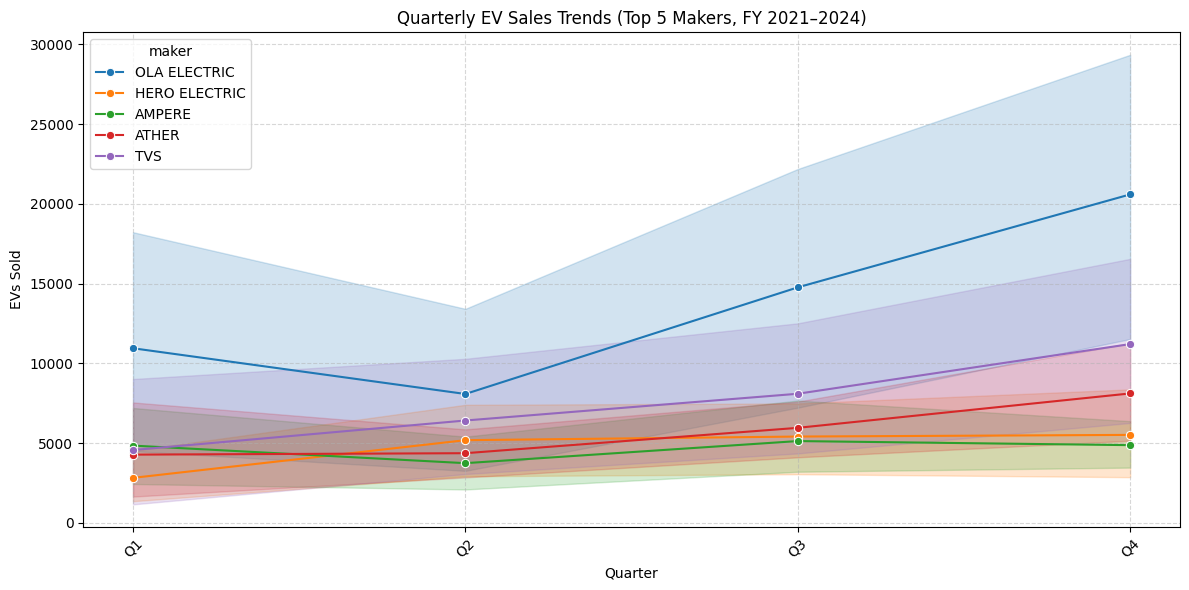

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# 1. Get top 5 makers by total sales
top_5_makers = merge_df.groupby("maker")["electric_vehicles_sold"].sum().nlargest(5).index

# 2. Filter for only top 5 makers
df_top5 = df[df["maker"].isin(top_5_makers)]

# 3. Merge with dim_date to get the 'quarter' column
df_top5 = pd.merge(df_top5, dim_date[["date", "quarter"]], on="date", how="left")

# 4. Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top5, x="quarter", y="electric_vehicles_sold", hue="maker", marker="o"
)

plt.title("Quarterly EV Sales Trends (Top 5 Makers, FY 2021–2024)")
plt.xlabel("Quarter")
plt.ylabel("EVs Sold")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()